# How does bushfire affect aquatic ecosystems in NSW?

In [243]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.ticker as ticker
import folium

In [244]:
shp_file_name = r"gda2020\nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/"
    "91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
    "5e295412-357c-49a2-98d5-6caf099c2339/download/"
    "nsw_locality_polygon_shp.zip"
)

In [245]:
%matplotlib inline

In [246]:
plt.rcParams["figure.figsize"] = (10, 5)

In [247]:
saved_style_state = matplotlib.rcParams.copy()

In [248]:
if os.path.isfile("bushfire-water-quality-dataset.csv"):
    filepath = "bushfire-water-quality-dataset.csv"
    print("loading from file")
else:
    filepath = "https://data.nsw.gov.au/search/dataset/ds-nsw-ckan-9e9b4c96-1a68-4dea-a5b0-23dd4cba9839/details?q="
    print("loading from the internet")
bushfire_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [249]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [250]:
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests

        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, "wb") as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


In [279]:
burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True)
burbs.sample(2)

LC_PLY_PID          LOC_PID   DT_CREATE     LOC_NAME  \
1052  lcpc49413a9a674  loc8e13f62ca167  2021-06-24  Cookardinia   
2943  lcpa3e759daf705  loc4597953a2de8  2021-06-24       Myalla   

              LOC_CLASS STATE  \
1052  Gazetted Locality   NSW   
2943  Gazetted Locality   NSW   

                                               geometry  
1052  POLYGON ((147.235 -35.471, 147.235 -35.471, 14...  
2943  POLYGON ((149.145 -36.397, 149.145 -36.398, 14...

In [252]:
addreses = [f"{x}, Australia" for x in bushfire_data.Estuary.unique()]
estuary_loc_df = gp.tools.geocode(addreses)
estuary_loc_df["Estuary"] = bushfire_data.Estuary.unique()
estuary_loc_df

geometry  \
0  POINT (150.48912 -35.26980)   
1  POINT (150.30111 -35.64833)   
2  POINT (152.46843 -32.01202)   
3  POINT (150.38514 -35.48396)   
4  POINT (150.38755 -35.46131)   
5  POINT (150.11384 -36.31759)   
6  POINT (152.48614 -32.38441)   
7  POINT (150.01689 -36.60990)   
8  POINT (150.06710 -36.37050)   
9  POINT (149.93029 -37.23272)   

                                             address            Estuary  
0     Lake Conjola, 2539, New South Wales, Australia       Lake Conjola  
1            Durras Lake, New South Wales, Australia        Durras Lake  
2                 Khappinghat Creek, 2430, Australia  Khappinghat Creek  
3                        Meroo Lake, 2539, Australia         Meroo Lake  
4                      Termeil Lake, 2539, Australia       Termeil Lake  
5                  Lake Tilba Tilba, 2546, Australia   Tilba Tilba Lake  
6                       Smiths Lake, 2428, Australia        Smiths Lake  
7                            Wapengo Lake, Australia       Wapengo Lake  
8  Wallaga Lake, 2546, Bega Valley Shire Council,...       Wallaga Lake  
9                            Wonboyn Lake, Australia       Wonboyn Lake

In [253]:
lake_df = bushfire_data.merge(estuary_loc_df, on="Estuary", how="inner")
lake_df.head()

Date Time Frame       Estuary Zone  Dissolved oxygen (% saturation)  \
0  31/10/2017   Pre-fire  Lake Conjola    1                            102.1   
1  31/10/2017   Pre-fire  Lake Conjola    2                            104.4   
2  23/11/2017   Pre-fire  Lake Conjola    1                             96.9   
3  23/11/2017   Pre-fire  Lake Conjola    2                             98.1   
4  19/12/2017   Pre-fire  Lake Conjola    1                            100.3   

   Salinity (psu)    pH Chlorophyll-a (ug/L)  Blue green algae (BGA, ug/L)  \
0            33.0  7.97                 2.63                          5.56   
1            34.0  8.05                  1.5                          2.32   
2            33.0  7.92                  2.5                          6.15   
3            34.0     8                 1.06                          2.39   
4            34.0   7.8                 2.61                          3.56   

  Turbidity (NTU)  fDOM (RFU) Dissolved nitrogen (ug/L)  \
0               1         3.0                     208.4   
1               0         2.0                       NaN   
2               1         3.0                       NaN   
3               1         2.0                       NaN   
4               1         4.0                     225.7   

   Total nitrogen (ug/L) Dissolved phosphorus (ug/L)  Total phosphorus (ug/L)  \
0                  326.5                       12.34                   22.600   
1                    NaN                         NaN                      NaN   
2                    NaN                         NaN                      NaN   
3                    NaN                         NaN                      NaN   
4                  287.7                    -1.97426                    6.388   

   Nitrogen oxides (NOx, ug/L)  Ammonia (NH3, ug/L)  Phosphate (PO4 3-, ug/L  \
0                      1.00000               3.0000                   0.0000   
1                          NaN                  NaN                      NaN   
2                          NaN                  NaN                      NaN   
3                          NaN                  NaN                      NaN   
4                      0.03515               0.2326                   0.6248   

                      geometry                                         address  
0  POINT (150.48912 -35.26980)  Lake Conjola, 2539, New South Wales, Australia  
1  POINT (150.48912 -35.26980)  Lake Conjola, 2539, New South Wales, Australia  
2  POINT (150.48912 -35.26980)  Lake Conjola, 2539, New South Wales, Australia  
3  POINT (150.48912 -35.26980)  Lake Conjola, 2539, New South Wales, Australia  
4  POINT (150.48912 -35.26980)  Lake Conjola, 2539, New South Wales, Australia

In [254]:
bushfire_data = pd.read_csv(
    filepath,
    infer_datetime_format=True,
    parse_dates=["Date"],
    dayfirst=True, 
)
bushfire_data.head(2)

C:\Users\ailee\AppData\Local\Temp\ipykernel_59388\2336673582.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bushfire_data = pd.read_csv(


Date Time Frame       Estuary Zone  Dissolved oxygen (% saturation)  \
0 2017-10-31   Pre-fire  Lake Conjola    1                            102.1   
1 2017-10-31   Pre-fire  Lake Conjola    2                            104.4   

   Salinity (psu)    pH Chlorophyll-a (ug/L)  Blue green algae (BGA, ug/L)  \
0            33.0  7.97                 2.63                          5.56   
1            34.0  8.05                  1.5                          2.32   

  Turbidity (NTU)  fDOM (RFU) Dissolved nitrogen (ug/L)  \
0               1         3.0                     208.4   
1               0         2.0                       NaN   

   Total nitrogen (ug/L) Dissolved phosphorus (ug/L)  Total phosphorus (ug/L)  \
0                  326.5                       12.34                     22.6   
1                    NaN                         NaN                      NaN   

   Nitrogen oxides (NOx, ug/L)  Ammonia (NH3, ug/L)  Phosphate (PO4 3-, ug/L  
0                          1.0                  3.0                      0.0  
1                          NaN                  NaN                      NaN

In [255]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(bushfire_data.Date.min(), date_format_pattern)
latest_date = datetime.strftime(bushfire_data.Date.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

'range is: November, 2013 to April, 2023'

How does bushfires affect the aquatic ecosystems in lakes of NSW?

Dataset: "2019/2020 Bushfire Inquiry project water quality dataset" from data.nsw.gov.au

Published by NSW Department of Climate Change, Energy, the ENvironment and Water on 31 May 2024

The dataset compiles the chang in levels of NSW lakes pre and post the 2019/2020 fire, with data ranging back to 2013 until 2023. The data explores different aspects that determines the suitability of water quality to aquatic ecosystems. 

In [256]:
bushfire_data.head(10)

Date Time Frame       Estuary Zone  Dissolved oxygen (% saturation)  \
0 2017-10-31   Pre-fire  Lake Conjola    1                            102.1   
1 2017-10-31   Pre-fire  Lake Conjola    2                            104.4   
2 2017-11-23   Pre-fire  Lake Conjola    1                             96.9   
3 2017-11-23   Pre-fire  Lake Conjola    2                             98.1   
4 2017-12-19   Pre-fire  Lake Conjola    1                            100.3   
5 2017-12-19   Pre-fire  Lake Conjola    2                            108.5   
6 2018-01-24   Pre-fire  Lake Conjola    1                             98.5   
7 2018-01-24   Pre-fire  Lake Conjola    2                             99.6   
8 2018-02-20   Pre-fire  Lake Conjola    2                             96.2   
9 2018-02-20   Pre-fire  Lake Conjola    1                            102.6   

   Salinity (psu)    pH Chlorophyll-a (ug/L)  Blue green algae (BGA, ug/L)  \
0            33.0  7.97                 2.63                          5.56   
1            34.0  8.05                  1.5                          2.32   
2            33.0  7.92                  2.5                          6.15   
3            34.0     8                 1.06                          2.39   
4            34.0   7.8                 2.61                          3.56   
5            34.0  7.91                 1.58                          1.73   
6            34.0  7.88                 3.52                          4.85   
7            34.0  7.91                 2.79                          3.73   
8            35.0  7.99                 9.59                         11.55   
9            35.0  8.01                11.29                         11.52   

  Turbidity (NTU)  fDOM (RFU) Dissolved nitrogen (ug/L)  \
0               1         3.0                     208.4   
1               0         2.0                       NaN   
2               1         3.0                       NaN   
3               1         2.0                       NaN   
4               1         4.0                     225.7   
5               0         2.0                       NaN   
6               1         3.0                       NaN   
7               0         3.0                       NaN   
8               0         3.0                       NaN   
9               1         3.0                     226.2   

   Total nitrogen (ug/L) Dissolved phosphorus (ug/L)  Total phosphorus (ug/L)  \
0                  326.5                       12.34                   22.600   
1                    NaN                         NaN                      NaN   
2                    NaN                         NaN                      NaN   
3                    NaN                         NaN                      NaN   
4                  287.7                    -1.97426                    6.388   
5                    NaN                         NaN                      NaN   
6                    NaN                         NaN                      NaN   
7                    NaN                         NaN                      NaN   
8                    NaN                         NaN                      NaN   
9                  155.2                        7.96                   18.490   

   Nitrogen oxides (NOx, ug/L)  Ammonia (NH3, ug/L)  Phosphate (PO4 3-, ug/L  
0                      1.00000               3.0000                   0.0000  
1                          NaN                  NaN                      NaN  
2                          NaN                  NaN                      NaN  
3                          NaN                  NaN                      NaN  
4                      0.03515               0.2326                   0.6248  
5                          NaN                  NaN                      NaN  
6                          NaN                  NaN                      NaN  
7                          NaN                  NaN                      NaN  
8                         

Bushfire

What is a bushfire and how did it occur in Australia in 2019-20?

Bushfire is a wildfire that burns in areas with wild vegetation. They occur due to hot and dry weather and can exponentially spread through lands, making it hard to control. September of 2019 was the start of the fire. It worsened through the months as Australia was approaching its summer, where the temperature heightened and a drought continued. Strong winds intensified the severity of the bushfire. A rainstorm then came in mid-February which extinguished a majority of the fire. By March, the fire was fully extinguished or contained. 

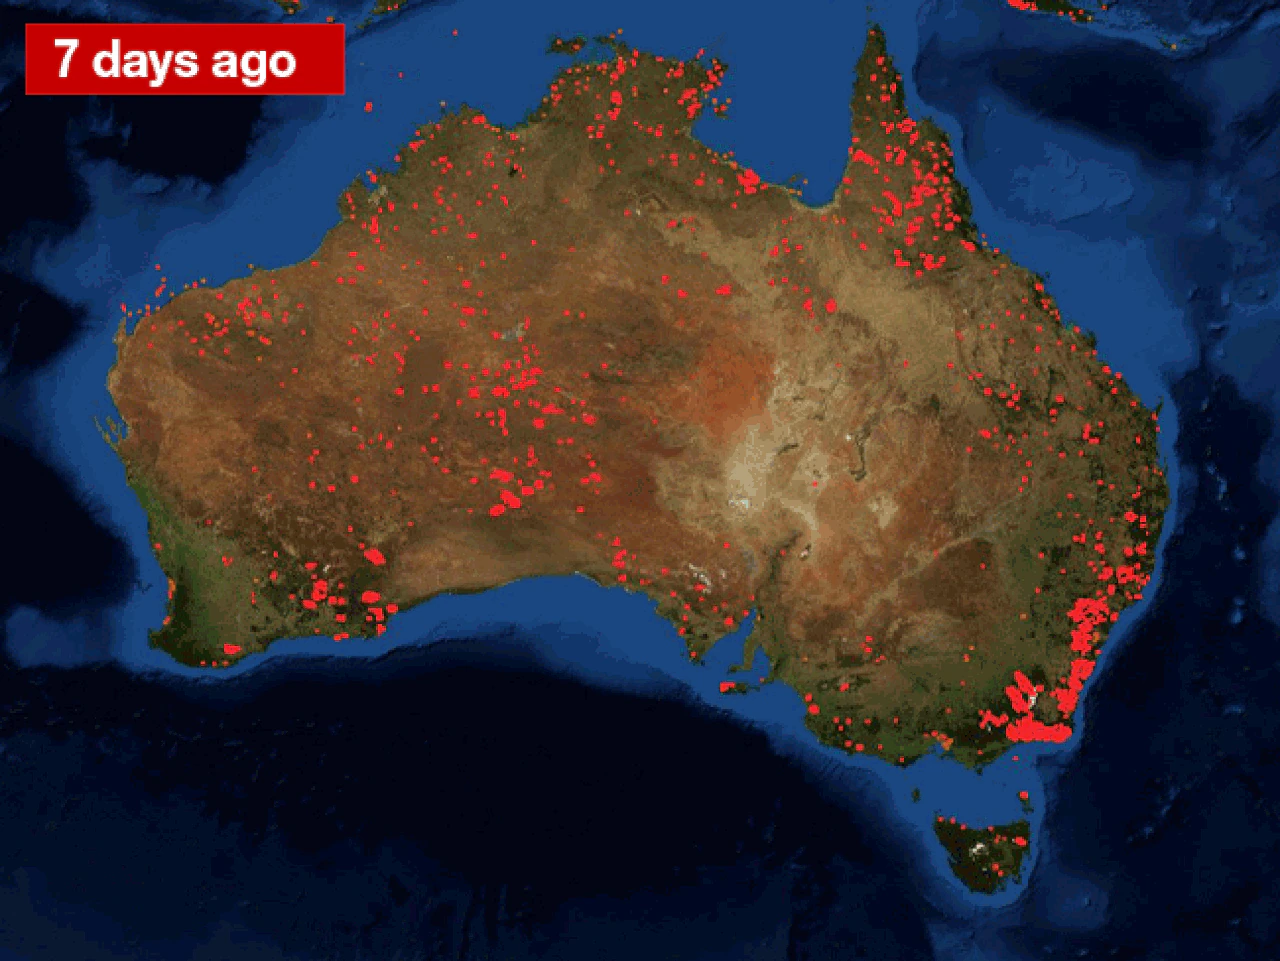

Figure 1: Australia bushfire affected area, 06-01-2020


In [257]:
from IPython.display import Image

with open("australia bushfire.webp", "rb") as file:
    display(Image(file.read()))
    print("Figure 1: Australia bushfire affected area, 06-01-2020")

In [258]:
bushfire_data.Estuary.unique()

array(['Lake Conjola', 'Durras Lake', 'Khappinghat Creek', 'Meroo Lake',
       'Termeil Lake', 'Tilba Tilba Lake', 'Smiths Lake', 'Wapengo Lake',
       'Wallaga Lake', 'Wonboyn Lake'], dtype=object)

The 10 lakes listed are lakes spread across NSW, as seen on the map below. 

Text(0.5, 1.0, 'Map of Lakes in NSW')

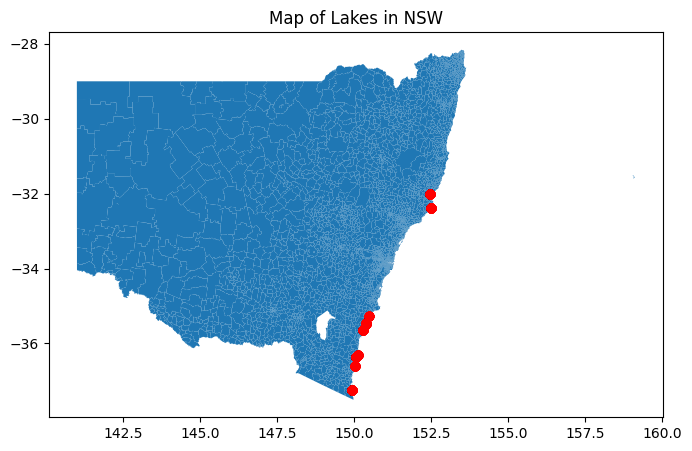

In [259]:
ax = burbs.plot()
gp.GeoDataFrame(lake_df).geometry.plot(ax=ax, c="r")
plt.title("Map of Lakes in NSW")

Text(0.5, 1.0, 'Map of Lakes in NSW')

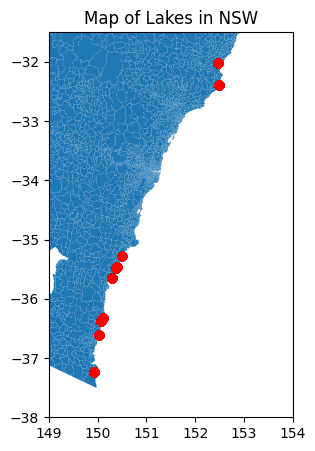

In [260]:
ax = burbs.plot()
ax.set_xlim(left=149, right=154)
ax.set_ylim(top=-31.5, bottom=-38)
gp.GeoDataFrame(lake_df).geometry.plot(ax=ax, c="r")
plt.title("Map of Lakes in NSW")

When looking at this map and the bushfire map (Figure 1) side by side, there is an overlapping of red points. During the bushfire of 2019 - 2020, areas affected were surrounding and including the lakes of NSW. 

In [280]:
bushfire_data['Time Frame'] = bushfire_data['Time Frame'].astype(str)

num_cols = bushfire_data.columns.difference(['Time Frame', 'Estuary'])

bushfire_data[num_cols] = bushfire_data[num_cols].apply(pd.to_numeric, errors='coerce')

average_pre_fire = (
    bushfire_data[bushfire_data["Time Frame"] == "Pre-fire"].groupby("Estuary")[num_cols].mean()
)
average_dur_fire = (
    bushfire_data[bushfire_data["Time Frame"] == "During fire"].groupby("Estuary")[num_cols].mean()
)
average_post_fire = (
    bushfire_data[bushfire_data["Time Frame"] == "Post-fire"].groupby("Estuary")[num_cols].mean()
)

In [262]:
bushfire_data['Time Frame'].unique()

array(['Pre-fire', 'Post-fire', 'During fire'], dtype=object)

In [263]:
def plot_estuary_data(df, estuary_name, column_name):
    estuary_df = df[df["Estuary"] == estuary_name].dropna(subset=[column_name])
    plt.plot(
        estuary_df["Date"],
        estuary_df[column_name],
        label=f"{estuary_name}",
    )

bushfire_data['Date'] = pd.to_datetime(bushfire_data['Date'])
bushfire_data.sort_values('Date', inplace=True)

### How did the water quality in these lakes change?

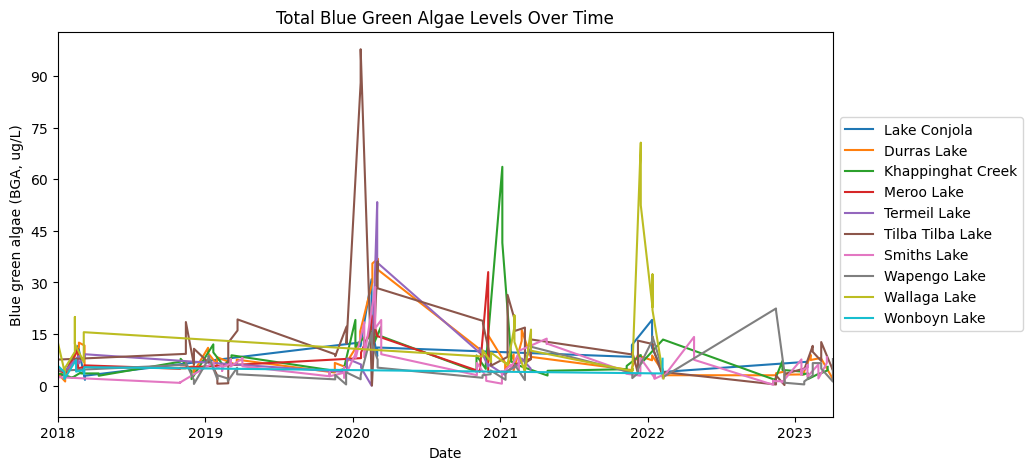

In [264]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

plt.figure()
for estuary in estuaries:
    column = "Blue green algae (BGA, ug/L)"
    plot_estuary_data(bushfire_data, estuary, column)

plt.title("Total Blue Green Algae Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Ever since the bushfire happened, spikes in blue green algae levels were recorded from multiple lakes throughout NSW. 

What are they and why are their significant?

Blue-green algae, also known as a microscopic bacteria named Cyanobacteria, are commonly found in bodies of water such as rivers, lakes, and dams. They are a natural threat to water quality due to a phenomenon called 'algal blooms', where they rapidly multiply into an unhealthy amount. They produce various types of toxins (hepatoxins, neurotoxins, and endotoxins) that are not only harmful to aquatic behaviour but also for human health. 

The algaes first reached its peak in 2020, right around the time the Bushfires were ongoing. It then also heightened a few more times in the continuing years. However, the correlation between the appearance of the bushfires and the influx in blue algae are not apparent from this graph alone. 

So, how does blue-green algal blooms tie back to the bushfires?

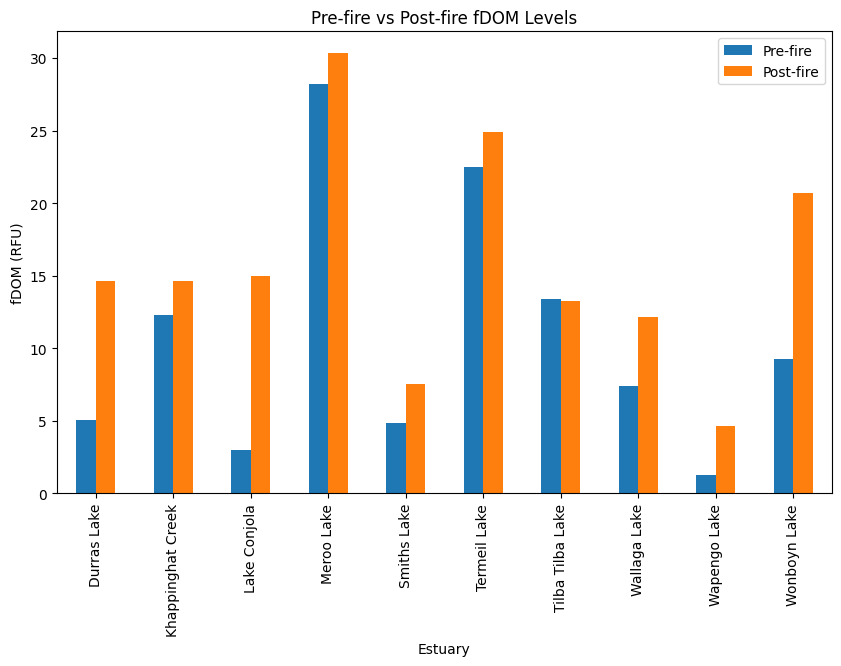

fDOM: Fluorescent Dissolved Organic Matter


In [265]:
fDOM_data = pd.DataFrame({
    'Pre-fire': average_pre_fire["fDOM (RFU)"],
    'Post-fire': average_post_fire["fDOM (RFU)"]
})

fDOM_data.plot(kind='bar', figsize=(10, 6))

plt.title('Pre-fire vs Post-fire fDOM Levels')
plt.xlabel('Estuary')
plt.ylabel('fDOM (RFU)')

plt.show()
print("fDOM: Fluorescent Dissolved Organic Matter")

A visible impact of bushfire was how it altered NSW's vegetation and soil. A lot of runoffs from this event went into the waters, introducing organic compounds from soils and vegetations into the lakes. The influx of organic materials mainly alter two main aspects of water, which are color and light availibility. 

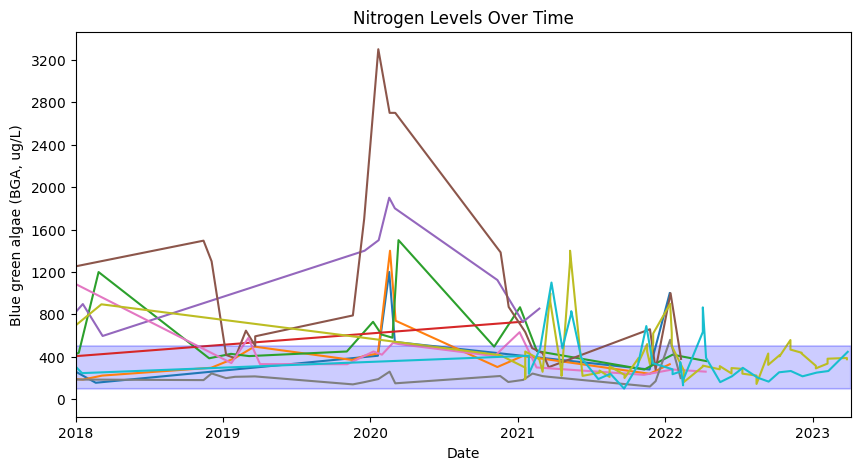

In [266]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

dates = bushfire_data["Date"]
healthy_minrange = [100] * len(dates)
healthy_maxrange = [500] * len(dates)

plt.figure()
for estuary in estuaries:
    plot_estuary_data(bushfire_data, estuary, "Total nitrogen (ug/L)")

plt.plot(dates, healthy_minrange, label="Custom Line 1", color='blue', alpha=0.1)
plt.plot(dates, healthy_maxrange, label="Custom Line 2", color='blue', alpha=0.1)

plt.fill_between(dates, healthy_minrange, healthy_maxrange, color='blue', alpha=0.2, label='Highlighted Area')

plt.title("Nitrogen Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)
plt.show()

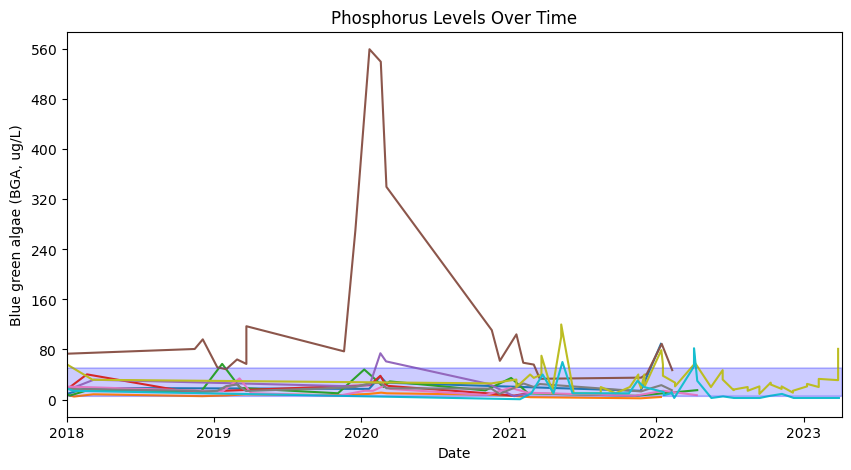

In [267]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

dates = bushfire_data["Date"]
healthy_minrange = [5] * len(dates)
healthy_maxrange = [50] * len(dates)

plt.figure()
for estuary in estuaries:
    plot_estuary_data(bushfire_data, estuary, "Total phosphorus (ug/L)")

plt.plot(dates, healthy_minrange, color='blue', alpha=0.1)
plt.plot(dates, healthy_maxrange, color='blue', alpha=0.1)

plt.fill_between(dates, healthy_minrange, healthy_maxrange, color='blue', alpha=0.2)

plt.title("Phosphorus Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)
plt.show()

Runoffs from vegetation and soil also leads to nutrient loading, where it releases high amount of nitrogen and phoshporus into lakes. Nutrient levels in lakes become exponentially higher, creating an inbalance in water composition. These nutrients act as a fertilizer for algaes, boosting their growth and triggering the algal blooms. Generally, the high and lows of levels appear in relatively similar time periods for the two chemicals. However, the peaks reached by the lakes are alarming as they often go out of the normal recommended range (highlighted by the blue area). While phosphorus levels stuck inside of the range more often, nitrogen levels peaked very often. Both levels reached far high during 2020 which could indicate its correlation to the high amounts of runoffs entering the waters during the occurance of bushfires. 

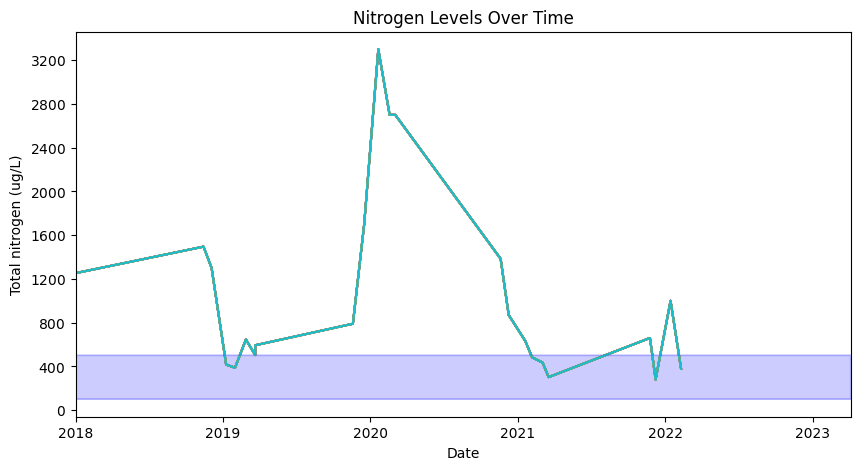

In [268]:
dates = bushfire_data["Date"]
healthy_minrange = [100] * len(dates)
healthy_maxrange = [500] * len(dates)

plt.figure()
for estuary in estuaries:
    column = "Total nitrogen (ug/L)"
    plot_estuary_data(bushfire_data, "Tilba Tilba Lake", column)

plt.plot(dates, healthy_minrange, label="Custom Line 1", color='blue', alpha=0.1)
plt.plot(dates, healthy_maxrange, label="Custom Line 2", color='blue', alpha=0.1)

plt.fill_between(dates, healthy_minrange, healthy_maxrange, color='blue', alpha=0.2, label='Highlighted Area')

plt.title("Nitrogen Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)
plt.show()

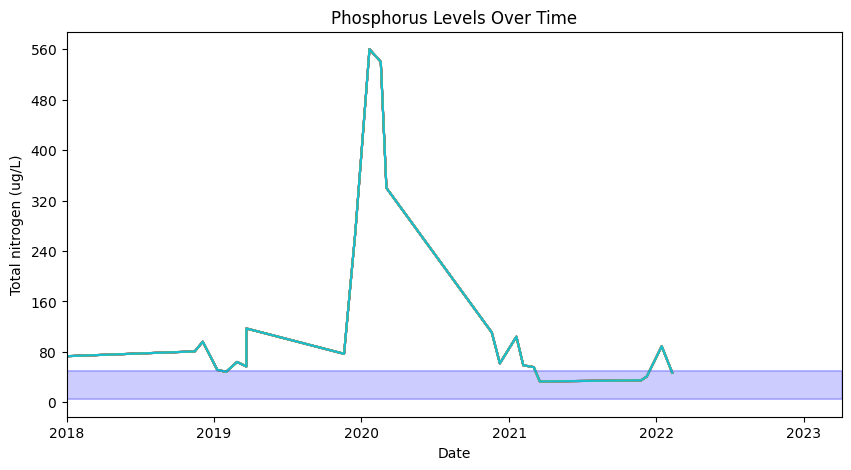

In [269]:
dates = bushfire_data["Date"]
healthy_minrange = [5] * len(dates)
healthy_maxrange = [50] * len(dates)

plt.figure()
for estuary in estuaries:
    plot_estuary_data(bushfire_data, "Tilba Tilba Lake", "Total phosphorus (ug/L)")

plt.plot(dates, healthy_minrange, color='blue', alpha=0.1)
plt.plot(dates, healthy_maxrange, color='blue', alpha=0.1)

plt.fill_between(dates, healthy_minrange, healthy_maxrange, color='blue', alpha=0.2, label='Highlighted Area')

plt.title("Phosphorus Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)
plt.show()

The peaks of nitrogen and phosphorus for the Tilba Tilba lake stood out the most, with approximately 3200 and 560 ug/L in 2020 respectively. This means that in 2020, nitrogen levels were 6 times and phosphorus levels were 11 times the maximum of the normal range. At other times, the levels only touched the normal range around the start of 2019 and the middle of 2021-2022. Thus, the nutrients supplied to algaes during 2020 are at an all time high and could drastically affect the balance of the aquatic ecosystem. 

We've gone over the cause of algal blooms,

How about its impacts to the lakes?

A sign of an algal bloom is a lake's turbidity. Turbidity refers to the cloudiness of a liquid, mainly due to the levels of small particles that are invisible to the naked eye. Turbidity can hint on the amount of light that can reach the bottom of the lake. As the lake becomes more cloudy, submerged aquatic plants and species receive inadequate amount of light, impeding biological processes such as photosynthesis.

The influx in fDOM is also apparent through the levels of turbidity, due to the increase in particles from runoffs pushed into the waters. Thus, fDOM and turbidity go hand in hand, and turbidity is directly proportional to fDOM.

In this case, turbidity is not only affected by fDOM, but also from algal bloom.

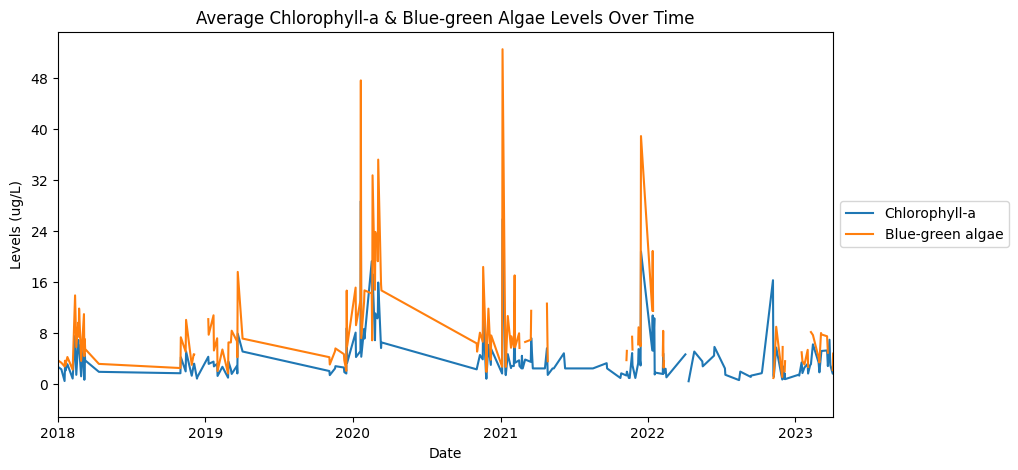

In [270]:
filtered_estuary_data = bushfire_data[bushfire_data['Estuary'].isin(estuaries)]

datec_data = filtered_estuary_data.groupby('Date')['Chlorophyll-a (ug/L)'].mean().reset_index()
dateb_data = filtered_estuary_data.groupby('Date')['Blue green algae (BGA, ug/L)'].mean().reset_index()


plt.figure()
plt.plot(datec_data['Date'], datec_data['Chlorophyll-a (ug/L)'], label='Chlorophyll-a')
plt.plot(dateb_data['Date'], dateb_data['Blue green algae (BGA, ug/L)'], label='Blue-green algae')

plt.title("Average Chlorophyll-a & Blue-green Algae Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data['Date'].max())
plt.ylabel("Levels (ug/L)")

plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


Chlorophyll-a is a pigment that helps algaes photosynthesize by absorbing light. As chlorophyll-a is a part of blue-green algaes, the trends in levels are almost identical, except for the values that they have. Increased levels can lead to alteration in color and odor of lakes, producing green scums and a bad smell. Lakes that are dominantly green can indicate overproduction of algae. They can reduce light penetration into the lake and affect the aquatic ecosystem.

In [271]:
from IPython.display import display

pre_fire_df = lake_df[lake_df['Time Frame'] == 'Pre-fire']
post_fire_df = lake_df[lake_df['Time Frame'] == 'Post-fire']

m = folium.Map(location=[-34.5, 151.5], zoom_start=7)

for idx, row in pre_fire_df.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=row['Turbidity (NTU)'] * 1, 
        color='tan',
        fill=True,
        fill_color='tan',
        fill_opacity=0.5,
        popup=f"Pre-fire Turbidity: {row['Turbidity (NTU)']}"
    ).add_to(m)

for idx, row in post_fire_df.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=row['Turbidity (NTU)'] * 1,
        color='brown',
        fill=True,
        fill_color='brown',
        fill_opacity=0.5,
        popup=f"Post-fire Turbidity: {row['Turbidity (NTU)']}"
    ).add_to(m)

display(m)

The plot sizes in the maps indicate turbidity levels of each lakes, with the tan colored plot being value for pre-fire and the red plot for post-fire. The turbidity varies for the two time frames, but as the map zooms out, it becomes clearer that post-fire turbidity reaches higher numbers. This could mean that either the levels of fDOM became high after the fire or that the production of algae has increased, or a mix of both. 

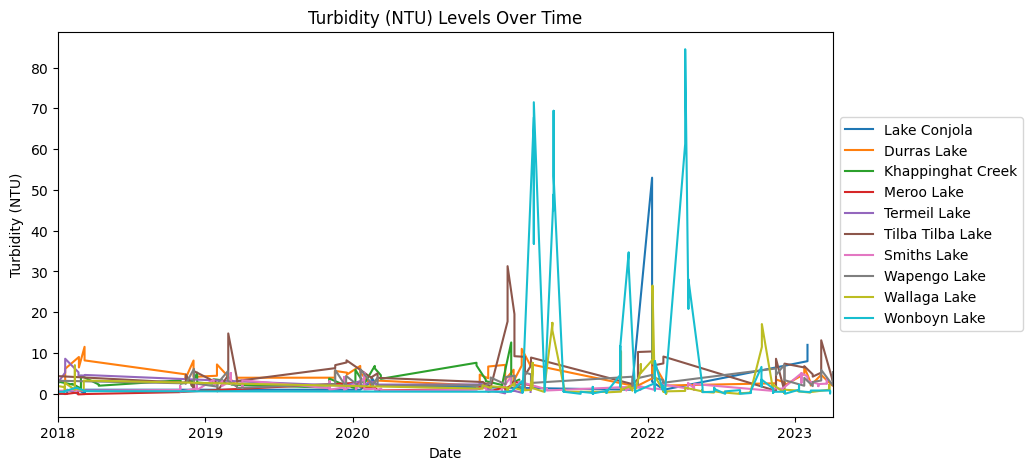

In [272]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

plt.figure()
for estuary in estuaries:
    column = "Turbidity (NTU)"
    plot_estuary_data(bushfire_data, estuary, column)

plt.title(f"{column} Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Meanwhile, this graph shows the peaks of turbidity over the years. The latter years shows that turbidity reached its peak after the bushfire. On the other hand, turbidity has always stuck between 0 - 10 NTU, more or less. The post-fire levels are especially high for Wonboyn Lake, which could point to how location may correlate with the severities in impact of the bushfire.

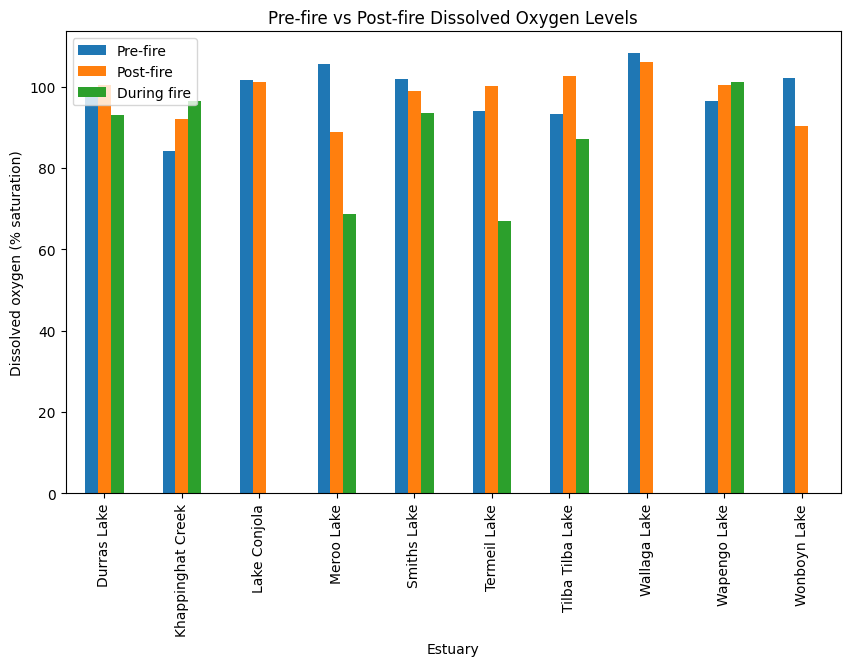

'During Fire' values for Conjola, Wallaga and Wonboyn Lake were not supplied in the dataset


In [273]:
fDOM_data = pd.DataFrame({
    'Pre-fire': average_pre_fire["Dissolved oxygen (% saturation)"],
    'Post-fire': average_post_fire["Dissolved oxygen (% saturation)"],
    'During fire': average_dur_fire["Dissolved oxygen (% saturation)"],
})

fDOM_data.plot(kind='bar', figsize=(10, 6))

plt.title('Pre-fire vs Post-fire Dissolved Oxygen Levels')
plt.xlabel('Estuary')
plt.ylabel('Dissolved oxygen (% saturation)')

plt.show()
print("'During Fire' values for Conjola, Wallaga and Wonboyn Lake were not supplied in the dataset")

Another impact is the amount of dissolved oxygen avilable in the lakes. The green bar shows that dissolved oxygen levels were particularly low for multiple lakes. This is due to elevated levles of fDOM and pollutants entering waterways that decrease the oxygen levels. Furthermore, the heat from the tall flames rapidly increased the temperature of the lakes, letting oxygen escape out of the water. Furthermore, a factor of algae growth is oxygen. With high Chlorophyll-a levels, dissolved oxygen levels deplete and more algae is produced in return. As a result, aquatic organisms could die out of oxygen depletion. 

Enough of Blue-green Algae... 

How did the bushfire affect the other aspects of the aquatic ecosystem?

Bushfire can also change a lake's pH due to the chemicals that enter the waters. pH relates to the acididty and alkalinity of a liquid. pH below 7 is acidic while pH over 7 is alkaline. It is factor that contributes to suitable water quality for the aquatic species in lakes. Drastic changes out of the normal range, as well as changes that occur to quickly may induce physiological stess to species. This may create negative outcomes such as less growth, reproduction and the occurances of diseases. Thus, aquatic lives might be in danger. 

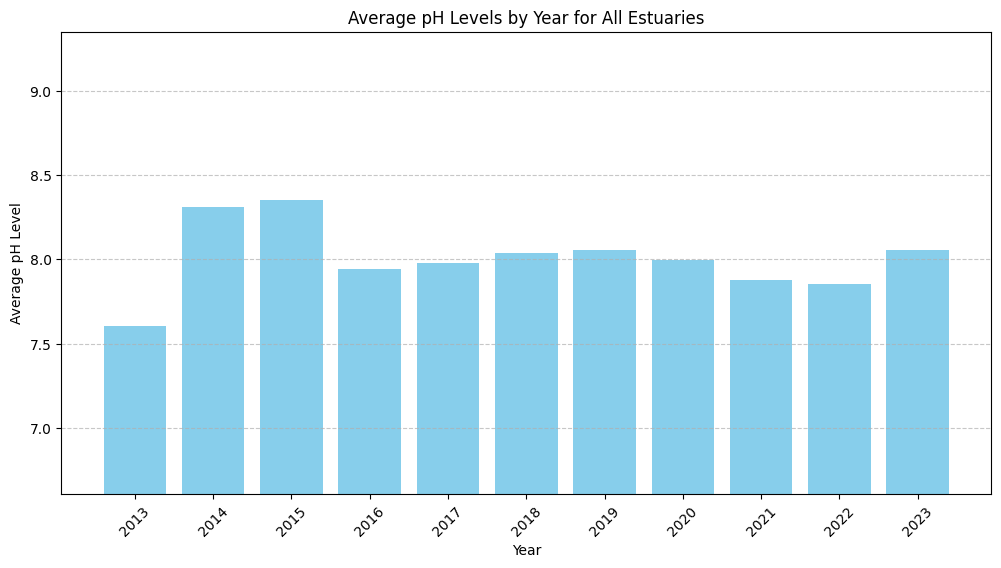

In [274]:
bushfire_data['Date'] = pd.to_datetime(bushfire_data['Date'])

bushfire_data['Year'] = bushfire_data['Date'].dt.year

avg_pH_per_year = bushfire_data.groupby(['Year'])['pH'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_pH_per_year.index, avg_pH_per_year, color='skyblue')

plt.title('Average pH Levels by Year for All Estuaries')
plt.xlabel('Year')
plt.ylabel('Average pH Level')
plt.xticks(avg_pH_per_year.index, rotation=45)
plt.ylim(min(avg_pH_per_year) - 1, max(avg_pH_per_year) + 1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The bar graph shows that most lakes stay around the 8 mark, other lakes are either more alkaline or acidic. For fresh waters, the general acceptable range is around 6 - 9. The average values  for each years show that the bushfire seems to lower the pH levels, albeit by a slight and safe amount. 

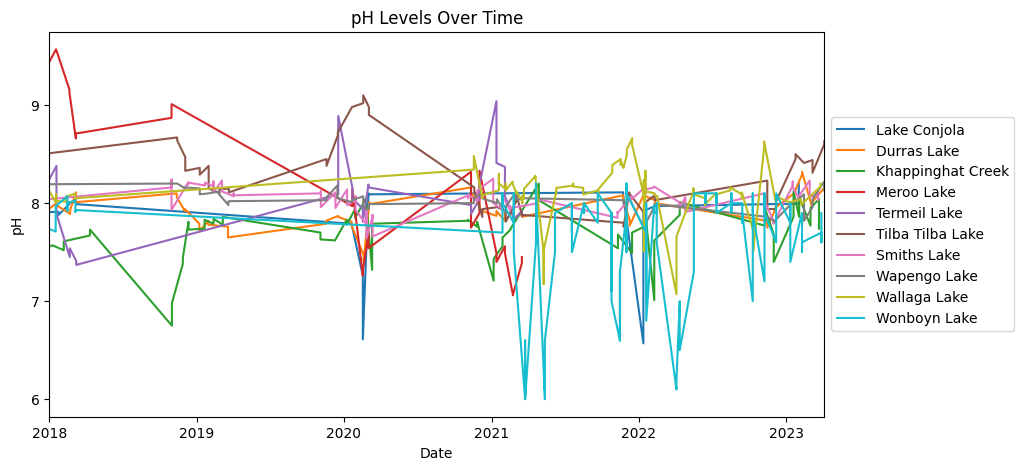

In [275]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

plt.figure()
for estuary in estuaries:
    column = "pH"
    plot_estuary_data(bushfire_data, estuary, column)

plt.title(f"{column} Levels Over Time")
plt.xlabel("Date")
plt.xlim(pd.Timestamp("2018"), bushfire_data["Date"].max())
plt.ylabel(column)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Meanwhile, the line graph shows more detail of the pH changes in each lakes. Rather than the level itself, its instability is worth taking note of. This is evident with the pH levels of Wonboyn lake, which keeps on hovering back and forth around the 6 and 8 mark. Instability can mess with an organism's ability to regulate their internal salt and water balance. Furthermore, it can decrease the amount of oxygen supply by affecting the their solubility in water. 

Another factor impacting water quality is Salinity. levels of dissolved salt in water increases from salt contained soil erosions that go into water. Due to lakes being freshwater, salinity levels are often very low. Increase of salinity that is out of the normal range may induce stress towards aquatic organisms.

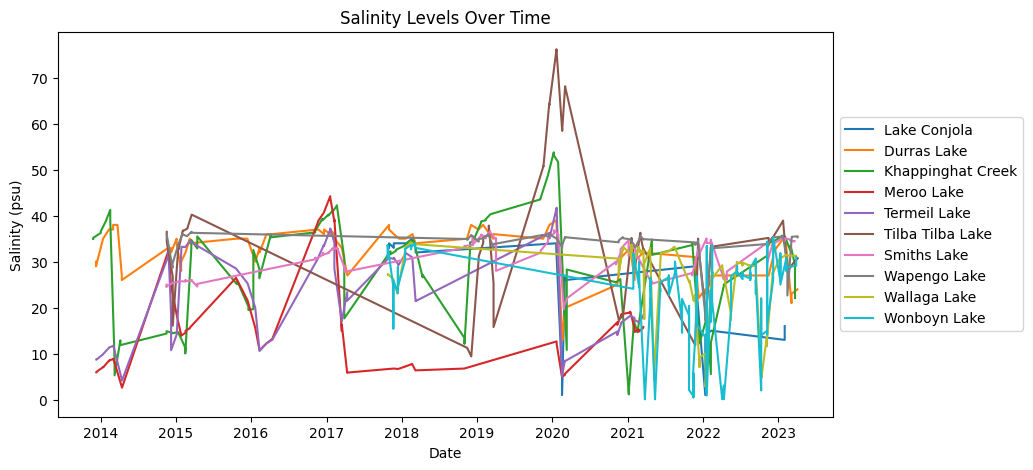

In [276]:
estuaries = [
    "Lake Conjola",
    "Durras Lake",
    "Khappinghat Creek",
    "Meroo Lake",
    "Termeil Lake",
    "Tilba Tilba Lake",
    "Smiths Lake",
    "Wapengo Lake",
    "Wallaga Lake",
    "Wonboyn Lake",
]

plt.figure()
for estuary in estuaries:
    plot_estuary_data(bushfire_data, estuary, "Salinity (psu)")

plt.title("Salinity Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Salinity (psu)")
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().tick_params(axis="y", which="major", labelsize=10)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Over the years, the salinity hovers over the low end up to 30 - 40. However, salinity levels in 2020 peaked for Tilba Tilba Lake, reaching more than 70 psu. Khappinghat also shows a salinity increase in 2019-2020, although not as high. Spikes in salinity, nitrogen, and phosphorus levels in Tilba Tilba lake may tie back to high levels of runoffs entering the water. 

In [291]:
col = [
    'Dissolved oxygen (% saturation)', 'Salinity (psu)', 'pH', 'Chlorophyll-a (ug/L)',
    'Blue green algae (BGA, ug/L)', 'Turbidity (NTU)', 'fDOM (RFU)', 'Dissolved nitrogen (ug/L)',
    'Total nitrogen (ug/L)', 'Dissolved phosphorus (ug/L)', 'Total phosphorus (ug/L)',
    'Nitrogen oxides (NOx, ug/L)', 'Ammonia (NH3, ug/L)'
]

highest_values = bushfire_data[col].max()
highest_values

Dissolved oxygen (% saturation)     199.13
Salinity (psu)                       76.19
pH                                    9.57
Chlorophyll-a (ug/L)                 57.85
Blue green algae (BGA, ug/L)         97.76
Turbidity (NTU)                      84.50
fDOM (RFU)                           59.00
Dissolved nitrogen (ug/L)          2300.00
Total nitrogen (ug/L)              3300.00
Dissolved phosphorus (ug/L)        1600.00
Total phosphorus (ug/L)             560.00
Nitrogen oxides (NOx, ug/L)         870.00
Ammonia (NH3, ug/L)                1415.00
dtype: float64

In [308]:
lake_df.columns

Index(['Date', 'Time Frame', 'Estuary', 'Zone',
       'Dissolved oxygen (% saturation)', 'Salinity (psu)', 'pH',
       'Chlorophyll-a (ug/L)', 'Blue green algae (BGA, ug/L)',
       'Turbidity (NTU)', 'fDOM (RFU)', 'Dissolved nitrogen (ug/L)',
       'Total nitrogen (ug/L)', 'Dissolved phosphorus (ug/L)',
       'Total phosphorus (ug/L)', 'Nitrogen oxides (NOx, ug/L)',
       'Ammonia (NH3, ug/L)', 'Phosphate (PO4 3-, ug/L', 'geometry',
       'address'],
      dtype='object')

In [312]:
column_names = [
    'Dissolved oxygen (% saturation)', 'Salinity (psu)', 'pH', 'Chlorophyll-a (ug/L)',
    'Blue green algae (BGA, ug/L)', 'Turbidity (NTU)', 'fDOM (RFU)', 'Dissolved nitrogen (ug/L)',
    'Total nitrogen (ug/L)', 'Dissolved phosphorus (ug/L)', 'Total phosphorus (ug/L)',
    'Nitrogen oxides (NOx, ug/L)', 'Ammonia (NH3, ug/L)'
]

for col in column_names:
    lake_df[col] = pd.to_numeric(lake_df[col], errors='coerce')
lake_df = lake_df.dropna(subset=column_names)

max_indices = lake_df[column_names].idxmax()
highest_lakes = lake_df.loc[max_indices]

Date   Time Frame            Estuary Zone  \
372  23/11/2017     Pre-fire       Termeil Lake    2   
433   3/03/2020  During fire   Tilba Tilba Lake    1   
479  18/03/2015     Pre-fire        Smiths Lake    1   
225   6/01/2021    Post-fire  Khappinghat Creek    1   
225   6/01/2021    Post-fire  Khappinghat Creek    1   
403  17/12/2014     Pre-fire   Tilba Tilba Lake    1   
356  13/04/2016     Pre-fire       Termeil Lake    2   
433   3/03/2020  During fire   Tilba Tilba Lake    1   
431  18/02/2020  During fire   Tilba Tilba Lake    1   
431  18/02/2020  During fire   Tilba Tilba Lake    1   
431  18/02/2020  During fire   Tilba Tilba Lake    1   
219  11/03/2020    Post-fire  Khappinghat Creek    1   
359  19/12/2016     Pre-fire       Termeil Lake    1   

     Dissolved oxygen (% saturation)  Salinity (psu)    pH  \
372                           163.26           30.86  8.92   
433                            66.95           68.06  8.90   
479                           107.27           25.93  9.57   
225                           107.69            1.15  7.21   
225                           107.69            1.15  7.21   
403                            78.67           16.08  8.31   
356                           106.49           13.02  8.06   
433                            66.95           68.06  8.90   
431                           119.20           58.43  9.02   
431                           119.20           58.43  9.02   
431                           119.20           58.43  9.02   
219                            93.98           10.80  7.32   
359                           108.65           33.39  7.56   

     Chlorophyll-a (ug/L)  Blue green algae (BGA, ug/L)  Turbidity (NTU)  \
372                  1.53                          2.33         1.060000   
433                 15.93                         28.29         3.910000   
479                  6.10                          4.12         2.370000   
225                 30.83                         63.59         2.143483   
225                 30.83                         63.59         2.143483   
403                  9.06                         13.56        60.190000   
356                  3.79                          7.74         1.890000   
433                 15.93                         28.29         3.910000   
431                 17.80                          0.00         3.820000   
431                 17.80                          0.00         3.820000   
431                 17.80                          0.00         3.820000   
219                  7.83                         17.05         4.566364   
359                  1.77                          2.80         4.670000   

     fDOM (RFU)  Dissolved nitrogen (ug/L)  Total nitrogen (ug/L)  \
372       18.21                     627.40                 654.20   
433       22.78                    1900.00                2700.00   
479        3.61                     366.00                 398.00   
225       44.99                     860.30                 867.40   
225       44.99                     860.30                 867.40   
403       23.82                     723.00                1241.00   
356       50.73                    1126.55                1241.12   
433       22.78                    1900.00                2700.00   
431        0.00                    1700.00                2700.00   
431        0.00                    1700.00                2700.00   
431        0.00                    1700.00                2700.00   
219       34.54                    1300.00                1500.00   
359       20.12                    1713.00                1850.00   

     Dissolved phosphorus (ug/L)  Total phosphorus (ug/L)  \
372                        13.26                    19.47   
433                       200.00                   340.00   
479                         3.90                     8.50   
225                        30.20                    34.50   
225                 

In [315]:
highest_values = lake_df[column_names].max()

highest_lakes = pd.DataFrame()

for col in column_names:
    max_value = highest_values[col]
    lake_with_max_value = lake_df[lake_df[col] == max_value]
    highest_lakes = pd.concat([highest_lakes, lake_with_max_value], ignore_index=True)


In [331]:
import folium
from folium.plugins import MarkerCluster

color_scheme = {
    'Dissolved oxygen (% saturation)': 'blue',
    'Salinity (psu)': 'green',
    'pH': 'purple',
    'Chlorophyll-a (ug/L)': 'orange',
    'Blue green algae (BGA, ug/L)': 'red',
    'Turbidity (NTU)': 'pink',
    'fDOM (RFU)': 'yellow',
    'Dissolved nitrogen (ug/L)': 'cyan',
    'Total nitrogen (ug/L)': 'brown',
    'Dissolved phosphorus (ug/L)': 'gray',
    'Total phosphorus (ug/L)': 'lightblue',
    'Nitrogen oxides (NOx, ug/L)': 'lightgreen',
    'Ammonia (NH3, ug/L)': 'lightcoral'
}

m = folium.Map(location=[-34.5, 151.5], zoom_start=7)

marker_cluster = MarkerCluster().add_to(m)

for col in column_names:
    max_value = highest_values[col]
    lake_with_max_value = lake_df[lake_df[col] == max_value]

    for _, row in lake_with_max_value.iterrows():
        color = color_scheme.get(col, 'gray')
        
        popup_text = f"""
        <b>{row['Estuary']}</b><br>
        <b>{col}</b><br>
        <b>Highest Value:</b> {max_value}
        """

        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=folium.Popup(popup_text, max_width=300),
            icon=folium.Icon(color=color)
        ).add_to(marker_cluster)

m

C:\Users\ailee\AppData\Local\Temp\ipykernel_59388\31754471.py:40: UserWarning: color argument of Icon should be one of: {'black', 'orange', 'pink', 'gray', 'darkred', 'green', 'beige', 'darkgreen', 'lightblue', 'darkpurple', 'lightgreen', 'white', 'darkblue', 'purple', 'blue', 'red', 'lightgray', 'cadetblue', 'lightred'}.
  icon=folium.Icon(color=color)


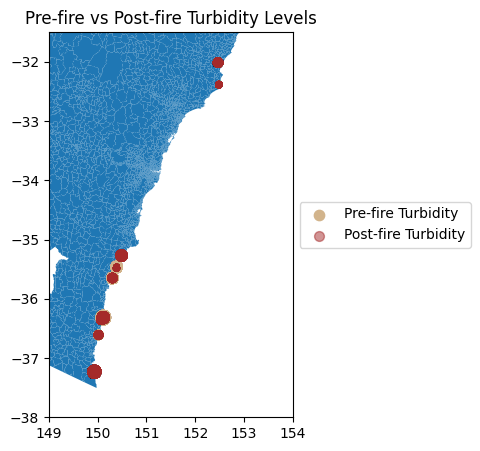

In [ ]:
turbidity_data = pd.DataFrame({
    'Pre-fire': average_pre_fire["Turbidity (NTU)"],
    'Post-fire': average_post_fire["Turbidity (NTU)"]
})

lake_df = lake_df.join(turbidity_data, on='Estuary', rsuffix='_turbidity')

lake_df = gp.GeoDataFrame(lake_df, geometry='geometry')

ax = burbs.plot()
ax.set_xlim(left=149, right=154)
ax.set_ylim(top=-31.5, bottom=-38)

lake_df.plot(ax=ax, color='tan', alpha=1.0, markersize=lake_df['Pre-fire']*10, label='Pre-fire Turbidity')

lake_df.plot(ax=ax, color='brown', alpha=0.5, markersize=lake_df['Post-fire']*10, label='Post-fire Turbidity')

plt.title('Pre-fire vs Post-fire Turbidity Levels')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()